In [14]:
# All imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPClassifier
import imblearn.over_sampling 
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


data = pd.read_csv('./online_shoppers_intention.csv')


# Categorical data:
# VisitorType, Month (truly categorical)
# Revenue (y)
# There are boolean and integer-encoded columns that are also kind of categorical...
data


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:
# iteration without TrafficType and Region as they have lowest pearson correlation to Revenue
categorical_features = ['OperatingSystems', 'Browser', 'VisitorType', 'Weekend', 'Month']
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

transformers = [
    ('one_hot', OneHotEncoder(), categorical_features),
    ('robustscale', RobustScaler(), numerical_features),  # Or RobustScaler() as needed
    ('minscale', MinMaxScaler(), numerical_features)  # Or MinMaxScaler() as needed
]

preprocessor = ColumnTransformer(transformers=transformers)

# Drop unnecessary categories in training data
x = data.drop(['Revenue', 'Region', 'TrafficType'], axis=1) 
y = data['Revenue'].astype(int) # Target


# Apply transformations
x_preproc = preprocessor.fit_transform(x)

# Splitting the dataset into develop data and final validation comparison
x_dev, x_val, y_dev, y_val = train_test_split(x_preproc, y, test_size=0.1, random_state=42)

# Apply SMOTE algorithm to even out amount of data for development for purchases to no purchases
print("Development Set Revenue Freq: ")
print(y_dev.value_counts(), "\n")
smo = SMOTE()
x_os, y_os = smo.fit_resample(x_dev, y_dev)
print("Oversampled Development Data Revenue Freq: ")
print(y_os.value_counts(), "\n")

# Splitting the dataset into training and testing sets after preprocessing all data
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.2, random_state=42)

Development Set Revenue Freq: 
Revenue
0    9392
1    1705
Name: count, dtype: int64 

Oversampled Development Data Revenue Freq: 
Revenue
0    9392
1    9392
Name: count, dtype: int64 



In [9]:
# mlp with parameters based on Hyperparameter tuning
mlp = MLPClassifier(solver='sgd', activation='logistic', learning_rate_init=0.1, max_iter=150, hidden_layer_sizes=(10, 10, 10), random_state=42)

# fit the model
mlp.fit(x_train, y_train)

# test against X_test
y_pred = mlp.predict(x_test)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [10]:
#conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=quality_range)

print("Accuracy Test Data: ", accuracy_score(y_test, y_pred) * 100)
print("Accuracy Train Data: ", accuracy_score(y_train, mlp.predict(x_train)) * 100)

print("Classification Report Test Data: ")
print(classification_report(y_test, y_pred))

print(y_pred[:5])
print("Confusion Matrix for each label : ")
print(confusion_matrix(y_test, y_pred))



Accuracy Test Data:  82.29970721320203
Accuracy Train Data:  82.33845744326878
Classification Report Test Data: 
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1877
           1       0.80      0.87      0.83      1880

    accuracy                           0.82      3757
   macro avg       0.83      0.82      0.82      3757
weighted avg       0.83      0.82      0.82      3757

[1 0 1 0 1]
Confusion Matrix for each label : 
[[1463  414]
 [ 251 1629]]


In [11]:
# params to evaluate
param_distributions = {
    'activation': ['relu', 'logistic'],
    'learning_rate_init': [0.1, 0.3, 0.5],
    'hidden_layer_sizes': [(20, 15), (23, 17, 13), (10, 10, 10)],
    'max_iter': [200, 500, 800]  # epochs
}

mlp = MLPClassifier(solver='sgd', random_state=42)

# set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_distributions, scoring=['accuracy'], refit='accuracy', cv=20, verbose=2)

# run the grid search
grid_search.fit(x_dev, y_dev)

# report best
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_  # Negating to get positive MSE value

best_params, best_accuracy

Fitting 20 folds for each of 54 candidates, totalling 1080 fits
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.1, max_iter=200; total time=   0.9s
[CV] END activation=relu, hidden_layer_s

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=200; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.3, max_iter=500; total time=

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   1.8s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   1.8s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   4.4s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   4.4s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   4.5s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   4.5s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.1s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   7.1s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   6.4s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(20, 15), learning_rate_init=0.5, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.1, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.1, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.1, max_iter=200;

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.2s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   5.9s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.2s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   5.9s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=500; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   9.4s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.3s


/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   9.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate_init=0.3, max_iter=800; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(23, 17, 13), learning_rate

/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ksuvarna47/anaconda3/lib/python3.11/site-packages/sklearn/neur

({'activation': 'logistic',
  'hidden_layer_sizes': (10, 10, 10),
  'learning_rate_init': 0.3,
  'max_iter': 200},
 0.8933952905974566)

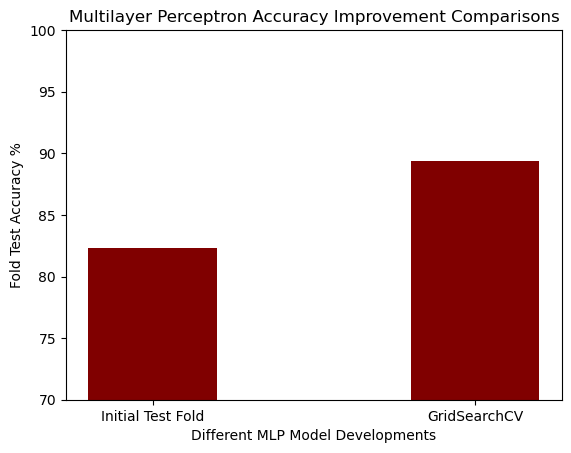

In [15]:
# Print the bar plot for accuracy comparisons with each trial of different appraoch to retrieving model
test_accuracies = [82.30, 89.34]
categories =['Initial Test Fold', 'GridSearchCV']
# creating the bar plot
plt.bar(categories, test_accuracies, color ='maroon', 
        width = 0.4)
plt.ylim(70, 100) 
plt.xlabel("Different MLP Model Developments")
plt.ylabel("Fold Test Accuracy %")
plt.title("Multilayer Perceptron Accuracy Improvement Comparisons")
plt.show()

In [19]:
# test against validation data for final comparison
y_pred_val = mlp_grids.predict(x_val)

# Print out all metrics for final validatino; mainly accuracy, f1-score, TPR, FPR 
accuracy_val = accuracy_score(y_val, y_pred_val)
print('GridSearchCV Accuracy Validation: %.3f' % (accuracy_val * 100), '%')
print(classification_report(y_val, y_pred_val))
metrics_results = classification_report(y_val, y_pred_val, output_dict = True)
print('F1-Score: ', metrics_results['macro avg']['f1-score'], '\n')
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val, labels=[0, 1]).ravel()
print(confusion_matrix(y_val, y_pred_val))
print('True Positive Rate: ', tp/(tp + fn))
print('False Positive Rate: ', fp/(fp + tn))

GridSearchCV Accuracy Validation: 88.808 %
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1030
           1       0.71      0.54      0.61       203

    accuracy                           0.89      1233
   macro avg       0.81      0.75      0.77      1233
weighted avg       0.88      0.89      0.88      1233

F1-Score:  0.7745301220145655 

[[985  45]
 [ 93 110]]
True Positive Rate:  0.541871921182266
False Positive Rate:  0.043689320388349516
